# OSMnx

**OSMnx** is a Python library that enables users to obtain spatial data and construct, project, visualize, and examine real-world street networks from OpenStreetMap's APIs. With just one line of Python code, users can download and create walkable, drivable, or bikeable urban networks, and then effortlessly analyze and visualize the results.

This notebook showcases an range of examples that exemplify the robust functionality and versatile capabilities of OSMnx, a cutting-edge Python library designed for researchers, urban planners, and GIS professionals. Through these curated samples, users can gain valuable insights into the myriad applications of OSMnx, empowering them to harness its sophisticated tools and techniques for spatial analysis, geospatial data extraction, network modeling, and cartographic visualization in the realm of urban and transportation planning.

## Import libraries for OSMnx and others

In [8]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

## Modeling a road network of a city with visualization

### Manila City

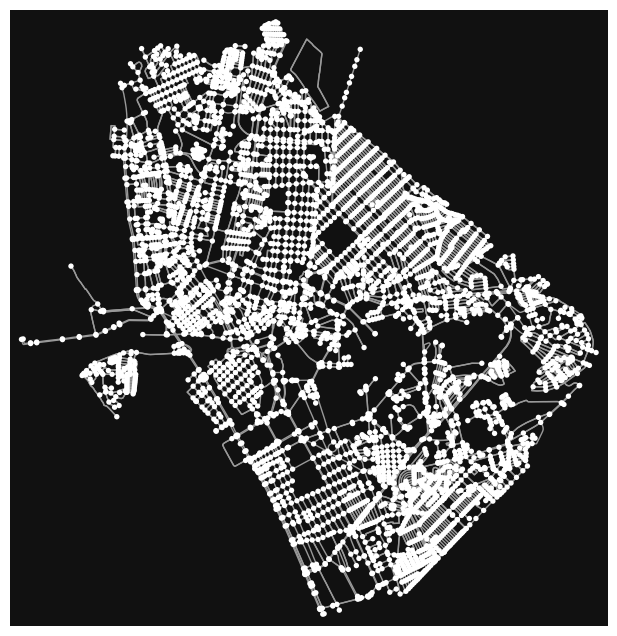

In [3]:
graph = ox.graph_from_place("Manila, Metro Manila, Philippines", network_type="drive")
fig, ax = ox.plot_graph(graph)

### Quezon City

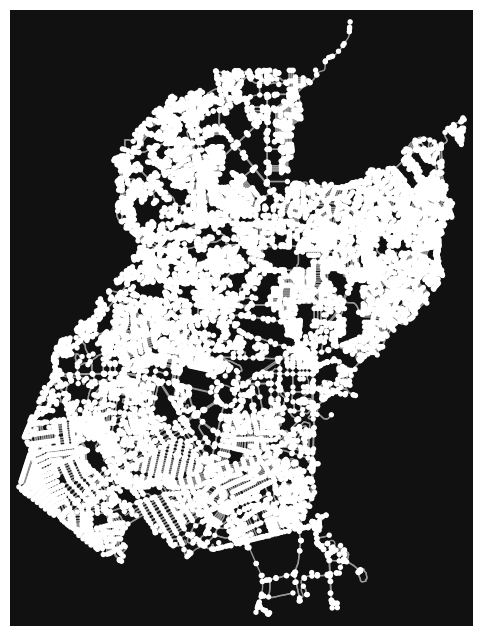

In [15]:
graph = ox.graph_from_place("Quezon City, Metro Manila, Philippines", network_type="drive")
fig, ax = ox.plot_graph(graph)

## Finding the shortest route

### Shortest route for Quezon City

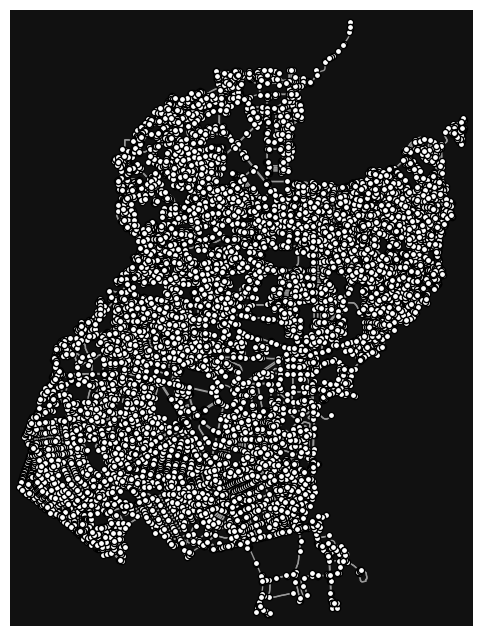

In [19]:
# Calculate the degree centrality for all nodes in the graph
degree_centrality = nx.degree_centrality(graph)

# Find the nodes with the highest and lowest degree centrality values
origin_node = max(degree_centrality, key=degree_centrality.get)
destination_node = min(degree_centrality, key=degree_centrality.get)

# Convert the graph to GeoDataFrames
nodes_gdf, _ = ox.graph_to_gdfs(graph)

# Get the geometries of the origin and destination nodes
origin_geometry = nodes_gdf.loc[origin_node, "geometry"]
destination_geometry = nodes_gdf.loc[destination_node, "geometry"]

# Plot the graph with the origin and destination nodes highlighted
fig, ax = ox.plot_graph(graph, node_color="w", node_edgecolor="k", node_size=20, node_zorder=2)
ax.scatter(*origin_geometry.xy, c="r", marker="o", zorder=3, label="Origin")
ax.scatter(*destination_geometry.xy, c="g", marker="o", zorder=3, label="Destination")
ax.legend()

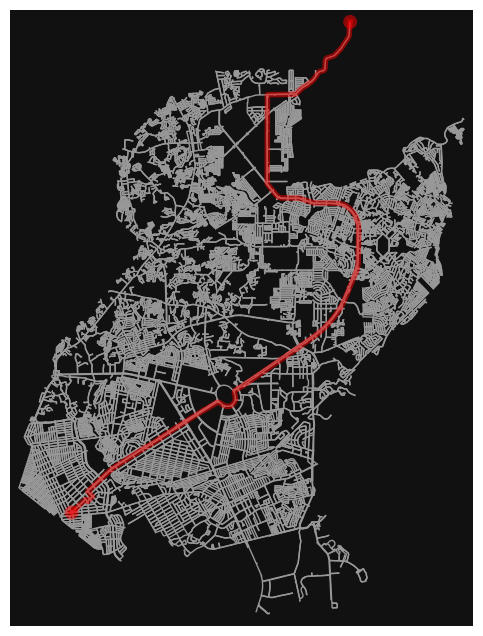

In [21]:
# Determine the most efficient route between nodes by minimizing travel time, and subsequently display it on a plot.
route = ox.shortest_path(graph, origin_node, destination_node, weight="travel_time")
fig, ax = ox.plot_graph_route(graph, route, node_size=0)